
--- Mean, Median & Skewness ---

                    Feature        Mean    Median  Skewness  Distribution
0               Pregnancies    3.845052    3.0000  0.899912  Right-Skewed
1                   Glucose  120.894531  117.0000  0.173414     Symmetric
2             BloodPressure   69.105469   72.0000 -1.840005   Left-Skewed
3             SkinThickness   20.536458   23.0000  0.109159     Symmetric
4                   Insulin   79.799479   30.5000  2.267810  Right-Skewed
5                       BMI   31.992578   32.0000 -0.428143     Symmetric
6  DiabetesPedigreeFunction    0.471876    0.3725  1.916159  Right-Skewed
7                       Age   33.240885   29.0000  1.127389  Right-Skewed


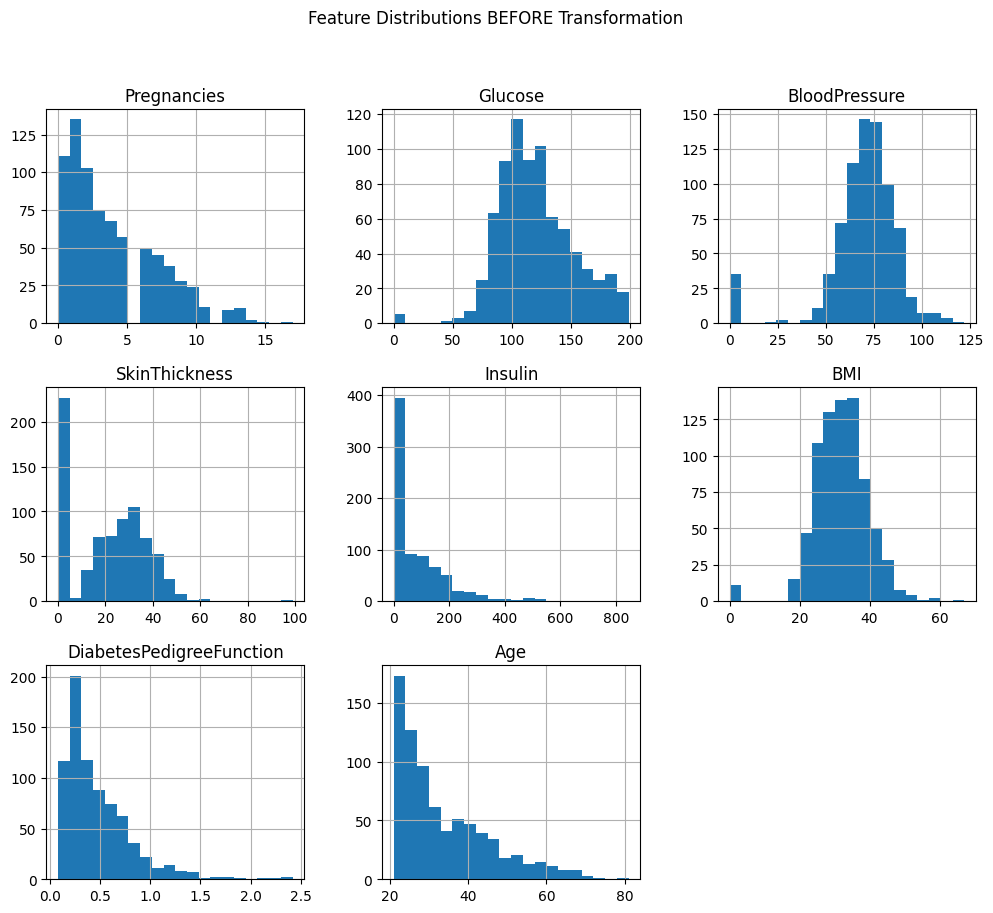


--- Skewness Comparison ---

                          Before_Transformation  After_Transformation
Pregnancies                            0.899912             -0.044557
Glucose                                0.173414              0.122400
BloodPressure                         -1.840005             -0.515797
SkinThickness                          0.109159             -0.457548
Insulin                                2.267810              0.049484
BMI                                   -0.428143              0.180486
DiabetesPedigreeFunction               1.916159              0.142043
Age                                    1.127389              0.149926


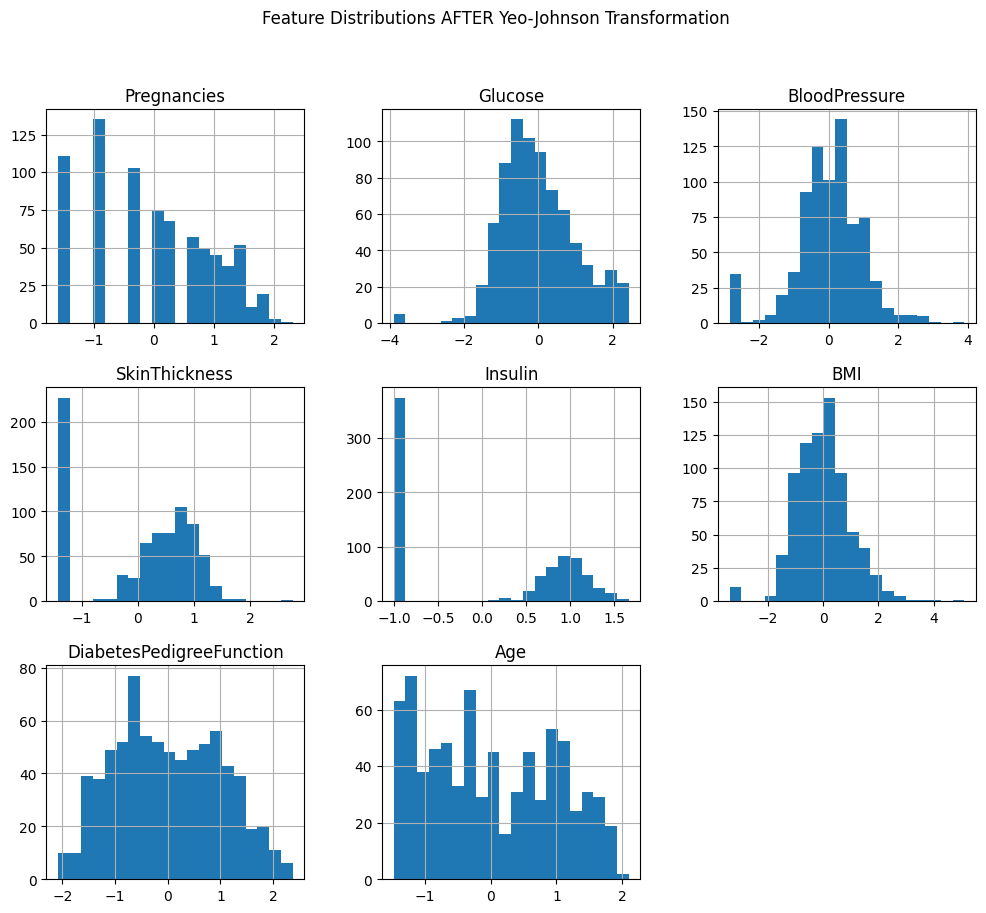

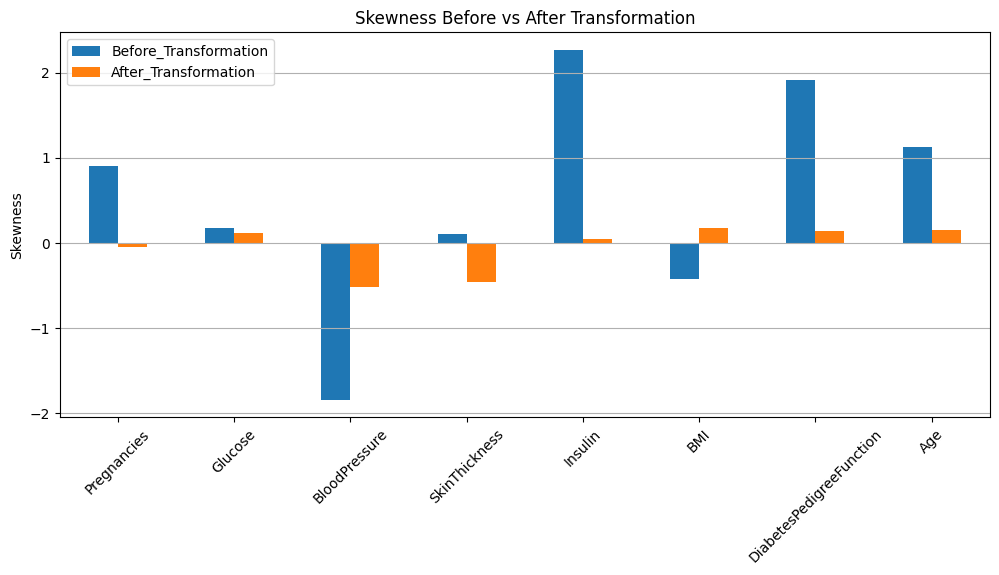

In [1]:
# ------------------------------------------------------------
# Programming Assignment 26
# Symmetry & Skewness Analysis – Pima Indians Diabetes Dataset
# ------------------------------------------------------------

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import skew
from sklearn.preprocessing import PowerTransformer

# -----------------------------
# 1. Load Dataset
# -----------------------------
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
columns = [
    "Pregnancies", "Glucose", "BloodPressure", "SkinThickness",
    "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"
]
df = pd.read_csv(url, names=columns)

# Separate features (exclude target)
features = df.drop(columns=["Outcome"])

# -----------------------------
# 2. Mean, Median, Skewness
# -----------------------------
results = []

for col in features.columns:
    mean_val = features[col].mean()
    median_val = features[col].median()
    skew_val = skew(features[col])

    if skew_val > 0.5:
        nature = "Right-Skewed"
    elif skew_val < -0.5:
        nature = "Left-Skewed"
    else:
        nature = "Symmetric"

    results.append([col, mean_val, median_val, skew_val, nature])

stats_df = pd.DataFrame(
    results,
    columns=["Feature", "Mean", "Median", "Skewness", "Distribution"]
)

print("\n--- Mean, Median & Skewness ---\n")
print(stats_df)

# -----------------------------
# 3. Histograms (Before)
# -----------------------------
features.hist(bins=20, figsize=(12, 10))
plt.suptitle("Feature Distributions BEFORE Transformation")
plt.show()

# -----------------------------
# 4. Yeo-Johnson Transformation
# -----------------------------
pt = PowerTransformer(method="yeo-johnson")
features_transformed = pt.fit_transform(features)

trans_df = pd.DataFrame(
    features_transformed,
    columns=features.columns
)

# -----------------------------
# 5. Skewness After Transformation
# -----------------------------
before_skew = features.apply(skew)
after_skew = trans_df.apply(skew)

skew_compare = pd.DataFrame({
    "Before_Transformation": before_skew,
    "After_Transformation": after_skew
})

print("\n--- Skewness Comparison ---\n")
print(skew_compare)

# -----------------------------
# 6. Histograms (After)
# -----------------------------
trans_df.hist(bins=20, figsize=(12, 10))
plt.suptitle("Feature Distributions AFTER Yeo-Johnson Transformation")
plt.show()

# -----------------------------
# 7. Bar Plot: Skewness Comparison
# -----------------------------
skew_compare.plot(kind="bar", figsize=(12, 5))
plt.title("Skewness Before vs After Transformation")
plt.ylabel("Skewness")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.show()
